In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv("/content/placement.csv")
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [3]:
df.drop(["Unnamed: 0"],axis=1,inplace=True)

In [4]:
df

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0
...,...,...,...
95,4.3,200.0,0
96,4.4,42.0,0
97,6.7,182.0,1
98,6.3,103.0,1


In [5]:
import matplotlib.pyplot as plt

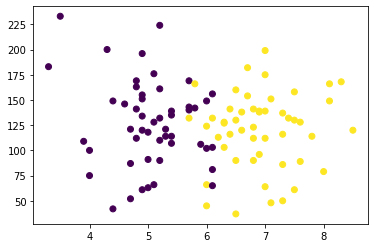

In [6]:
plt.scatter(df["cgpa"],df["iq"],c=df["placement"])

In [7]:
x=df.iloc[:,0:2]
y=df.iloc[:,-1]

In [8]:
x

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [9]:
y

0     1
1     0
2     0
3     1
4     0
     ..
95    0
96    0
97    1
98    1
99    1
Name: placement, Length: 100, dtype: int64

In [10]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1)

In [11]:
x_test

,cgpa,iq
82,6.5,37.0
6,5.7,143.0
90,7.3,86.0
2,5.3,121.0
52,7.0,175.0
69,8.5,120.0
98,6.3,103.0
25,5.0,91.0
56,6.1,65.0
43,6.8,141.0


In [12]:
x_train

,cgpa,iq
72,7.3,116.0
64,7.0,64.0
83,7.5,130.0
54,6.4,141.0
88,4.4,149.0
...,...,...
23,4.7,87.0
81,5.4,107.0
14,6.1,103.0
13,6.4,116.0


In [13]:
y_test

82    1
6     0
90    1
2     0
52    1
69    1
98    1
25    0
56    0
43    1
Name: placement, dtype: int64

In [14]:
from sklearn.preprocessing import StandardScaler

In [15]:
scaler=StandardScaler()

In [16]:
x_train=scaler.fit_transform(x_train)

In [17]:
x_train

array([[ 1.18946899, -0.23507472],
       [ 0.92708612, -1.55104324],
       [ 1.3643909 ,  0.1192245 ],
       [ 0.40232039,  0.39760245],
       [-1.34689871,  0.60005915],
       [-0.64721107,  2.49809067],
       [-0.55975011, -0.28568889],
       [-0.47228916,  0.24575993],
       [-1.69674253, -1.27266528],
       [ 0.83962517,  0.32168119],
       [ 0.92708612, -0.33630307],
       [-1.08451584, -1.85472828],
       [-2.1340473 ,  2.72585445],
       [-1.43435966,  1.89072058],
       [ 0.92708612,  1.8654135 ],
       [ 0.5772423 , -0.13384637],
       [ 0.75216421, -0.05792511],
       [-0.47228916, -0.28568889],
       [ 0.05247657, -0.03261802],
       [ 1.18946899, -1.90534246],
       [ 0.22739848, -0.31099598],
       [ 0.48978135,  0.1192245 ],
       [ 0.31485944,  0.04330324],
       [-0.90959393,  1.78949224],
       [-1.1719768 ,  0.52413789],
       [-0.64721107, -0.38691724],
       [-1.08451584, -0.10853928],
       [-0.73467202,  0.06861032],
       [ 0.48978135,

In [18]:
x_test=scaler.transform(x_test)
x_test

array([[ 0.48978135, -2.23433459],
       [-0.20990629,  0.44821663],
       [ 1.18946899, -0.99428733],
       [-0.55975011, -0.10853928],
       [ 0.92708612,  1.25804341],
       [ 2.23900045, -0.13384637],
       [ 0.31485944, -0.56406685],
       [-0.82213298, -0.86775189],
       [ 0.13993753, -1.52573615],
       [ 0.75216421,  0.39760245]])

In [19]:
from sklearn.linear_model import LogisticRegression

In [20]:
clf = LogisticRegression()

In [21]:
clf.fit(x_train,y_train)

LogisticRegression()

In [25]:
y_pred=clf.predict(x_test)

In [24]:
y_test

82    1
6     0
90    1
2     0
52    1
69    1
98    1
25    0
56    0
43    1
Name: placement, dtype: int64

In [26]:
from sklearn.metrics import accuracy_score

In [27]:
accuracy_score(y_test,y_pred)

0.9

In [28]:
from mlxtend.plotting import plot_decision_regions

/usr/local/lib/python3.8/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


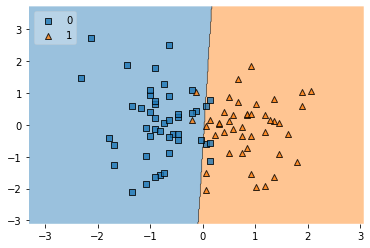

In [30]:
plot_decision_regions(x_train, y_train.values, clf=clf, legend=2)

In [31]:
import pickle

In [32]:
pickle.dump(clf,open("model.pkl","wb"))